# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

$$
\begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \lambda \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}
$$

Como existe um $\lambda$ tal que $Xv = \lambda v$ ($\lambda$ =0.5), então $v$ é um auto-vetor de $X$.

In [51]:
# Isso não é a resposta do exercício - mas mostra alguns caminhos para encontrar a resposta.
import numpy as np
P = np.array([[1, 0], [1, 1]]).T
Q = np.diag([1.5, 0.5])
X = P @ Q @ np.linalg.inv(P)

print("X")
print(X)
v, w = np.linalg.eig(X)
print("v")
print(v)
print("w")
print(w)

V = np.array([[1, 1]]).T
print("X @ V")
print(X @ V)

def verifica_se_eh_autovetor(X, V):
    mult = X @ V
    # Se o vetor for um autovetor, deve ter um lambda tal que X @ V = lambda * V
    alpha = 0.00001
    while True:
        if np.allclose(mult, alpha * V):
            print("Autovetor encontrado com lambda = ", alpha)
            return alpha
        alpha += 0.00001
        if alpha > 10:
            print("Não é autovetor")
            return None

print(verifica_se_eh_autovetor(X, V))


X
[[ 1.5 -1. ]
 [ 0.   0.5]]
v
[1.5 0.5]
w
[[1.         0.70710678]
 [0.         0.70710678]]
X @ V
[[0.5]
 [0.5]]
Autovetor encontrado com lambda =  0.5000000000003593
0.5000000000003593


In [35]:
import numpy as np

x = np.array([[1.5,-1],
              [0,0.5]])

w,v = np.linalg.eig(x)

#AUTOVETORES DE X
print(v)

v[:,0] /= v[1,0]

print(v)

# Explique o que aconteceu
# O que aconteceu foi que o autovetor 1 foi dividido pelo autovetor 2, ou seja, o autovetor 1 foi dividido pelo autovetor 2, o que resultou em um novo autovetor 1.

[[1.         0.70710678]
 [0.         0.70710678]]
[[       inf 0.70710678]
 [       nan 0.70710678]]


C:\Users\iancd\AppData\Local\Temp\ipykernel_59304\3078395566.py:11: RuntimeWarning: divide by zero encountered in divide
  v[:,0] /= v[1,0]
C:\Users\iancd\AppData\Local\Temp\ipykernel_59304\3078395566.py:11: RuntimeWarning: invalid value encountered in divide
  v[:,0] /= v[1,0]


# Exercício 2

Analise o código abaixo. 

Por que o terceiro painel mostra uma imagem igual à do primeiro painel?

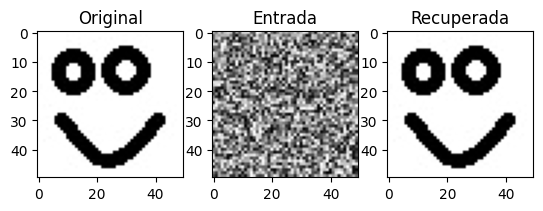

In [36]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Carregando imagem inicial
A = mpimg.imread("smile.jpg").mean(axis=2) # Convertendo para preto e branco

# Construindo matriz de recuperacao
N = A.shape[0] * A.shape[1]
P = np.random.randn(N, N)
P[:,0] = A.reshape( (-1,) )
Q = np.ones(N) * 0.9
Q[0] = 1
Q = np.diag(Q)
X = P @ Q @ np.linalg.inv(P)

# Criando imagem puramente ruidosa
B = np.random.random(A.shape)

# Aplicando matriz de recuperacao
C = B.reshape( (-1, 1) )
for _ in range(100):
    C = X @ C
C = C.reshape(A.shape)

# Plotando imagem inicial, ruidosa e recuperada
plt.figure()
plt.subplot(1,3,1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(B, cmap='gray')
plt.title('Entrada')
plt.subplot(1,3,3)
plt.imshow(C, cmap='gray')
plt.title('Recuperada')
plt.show()

# Exercício 3

O código abaixo busca contar palavras únicas em um texto (o texto, neste caso, é o clássico livro "Moby Dick"). Contar palavras únicas significa contar quantas palavras diferentes existem em um texto - por exemplo, "ESTE TEXTO É UM TESTE" tem 5 palavras únicas, ao passo que "ESTE TEXTO É UM TEXTO" tem 4 palavras únicas.

A maneira que a função funciona é manter uma lista com todas as palavras que já foram vistas. Daí, para cada nova palavra, verificamos se ela já existe na nossa lista. Caso não exista, adicionamos a palavra, e, ao fim do processo, retornamos o tamanho dessa lista de palavras já vistas.

O problema do código é que verificar se uma palavra está em uma lista envolve varrer a lista inteira, o que, para um texto de $N$ palavras, pode levar $N$ iterações. Como fazemos isso $N$ vezes (uma para cada palavra do texto), então temos um algoritmo que executa em tempo quadrático, isto é, $O(N^2)$.

Como o tempo de execução do algoritmo cresce muito rapidamente com o aumento do número de palavras do texto, demora muito para contar palavras únicas no texto inteiro de Moby Dick. Porém, podemos medir o tempo de execução para apenas as primeiras palavras do texto.

Como sabemos que o tempo $t$ de execução do algoritmo para $N$ palavras é um polinômio de segundo grau, então:

$
t = A N^2 + BN + C,
$

use os dados da execução do teste abaixo no seu computador para fazer uma regressão usando autograd, encontre $A$, $B$ e $C$, e estime quanto tempo levaria para este algoritmo contar as palavras de todo o texto de Moby Dick.

In [54]:
import numpy as np
import autograd.numpy as np_
from autograd import grad

import urllib.request
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
data = urllib.request.urlopen(url).read().decode('utf-8')
words = data.split()

def contar_palavras_unicas(lista_de_palavras):
    ja_contei = []
    for palavra in lista_de_palavras:
        if palavra not in ja_contei:
            ja_contei.append(palavra)
    return len(ja_contei)

lista_N = [] # Número de palavras
lista_t = [] # Tempo de execução
for N in tqdm(range(100, int(len(words)/8), 1000)):
    t0 = time.time()
    contar_palavras_unicas(words[0:N])
    t1 = time.time()
    t = t1-t0
    lista_N.append(N)
    lista_t.append(t)

100%|██████████| 27/27 [00:03<00:00,  7.26it/s]


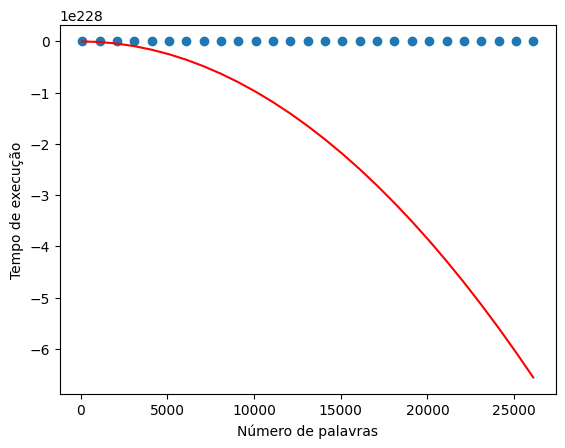

In [62]:


A = 0.0
B = 0.0
C = 0.0

alpha = 10 ** -15

lista_N_ = np_.array(lista_N)*1.0
lista_t_ = np_.array(lista_t)*1.0

def loss(parametros):
    A, B, C, N, lista_t_ = parametros
    estimativa = A * N ** 2 + B * N + C
    erro = np_.mean((estimativa - lista_t_) ** 2)
    return erro

dloss = grad(loss)

for i in range(100):
    g = dloss((A, B, C, lista_N_, lista_t_))
    A -= alpha * g[0]
    B -= alpha * g[1]
    C -= alpha * g[2]

funcao_encontrada = A * np.array(lista_N_) ** 2 + B * np.array(lista_N) + C

plt.figure()
plt.xlabel('Número de palavras')
plt.ylabel('Tempo de execução')
plt.scatter(lista_N, lista_t)
plt.plot(lista_N, funcao_encontrada, color='red')
plt.show()


100%|██████████| 27/27 [00:04<00:00,  5.93it/s]
c:\Users\iancd\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
C:\Users\iancd\AppData\Local\Temp\ipykernel_59304\1502656121.py:50: RuntimeWarning: invalid value encountered in scalar subtract
  A -= alpha * g[0]
C:\Users\iancd\AppData\Local\Temp\ipykernel_59304\1502656121.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  B -= alpha * g[1]


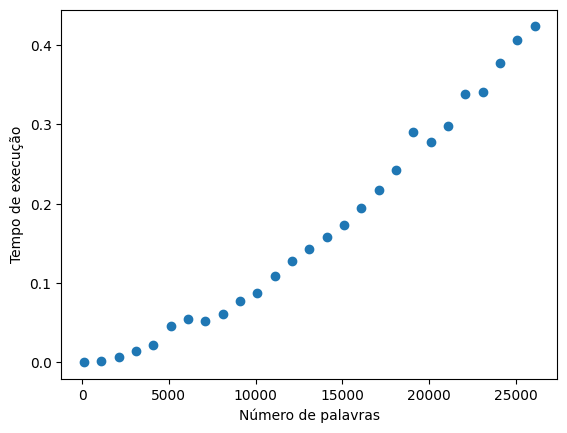

In [49]:
import numpy as np
import autograd.numpy as np_
from autograd import grad

import urllib.request
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
data = urllib.request.urlopen(url).read().decode('utf-8')
words = data.split()

def contar_palavras_unicas(lista_de_palavras):
    ja_contei = []
    for palavra in lista_de_palavras:
        if palavra not in ja_contei:
            ja_contei.append(palavra)
    return len(ja_contei)

lista_N = [] # Número de palavras
lista_t = [] # Tempo de execução
for N in tqdm(range(100, int(len(words)/8), 1000)):
    t0 = time.time()
    contar_palavras_unicas(words[0:N])
    t1 = time.time()
    t = t1-t0
    lista_N.append(N)
    lista_t.append(t)

A = 0.0
B = 0.0
C = 0.0

alpha = 10 ** -3

def loss(parametros):
    A, B, C, N, lista_t_ = parametros
    lista_t_ = np_.array(lista_t_, dtype=np.float64) # Converter lista_t_ para o tipo float64
    estimativa = A * N ** 2 + B * N + C
    erro = np_.mean((estimativa - lista_t_) ** 2)
    return erro

dloss = grad(loss)

for i in range(10000):
    g = dloss((A, B, C, lista_N, lista_t)) # Passar lista_N e lista_t diretamente
    A -= alpha * g[0]
    B -= alpha * g[1]
    C -= alpha * g[2]

funcao_encontrada = A * np.array(lista_N) ** 2 + B * np.array(lista_N) + C

plt.figure()
plt.xlabel('Número de palavras')
plt.ylabel('Tempo de execução')
plt.scatter(lista_N, lista_t)
plt.plot(lista_N, funcao_encontrada, color='red')
plt.show()

# Exercício 4

Um algoritmo promete comprimir a palavra `ABACATEIRO` em apenas 10 bits. Esse algoritmo é:

1. Mais, igualmente ou menos eficaz que o código de Huffman?

Seria muito mais eficaz, visto que o código de Huffman precisaria de 29 bits no mínimo

2. Possível ou impossível de acordo com o limite teórico dado pela entropia?

Seguindo o limite teórico dado pela entropia, seria impossível representar essa palavra com apenas 10 bits.

```python
import numpy as np
import scipy.stats as stats
palavra = "ABACATEIRO"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs, base=2)
E*len(palavra) # 28.464393446710154, ou seja 29 bits
```